In [2]:
import tensorflow as tf #8 pip install tensorflow-gpu 
import cv2 ### pip install opencv-python
## pip install opencv-contrib-python fullpackage
import os
import matplotlib.pyplot as plt ## pip install matplotlib import numpy as np ## pip install numpy

TypeError: Image data of dtype object cannot be converted to float

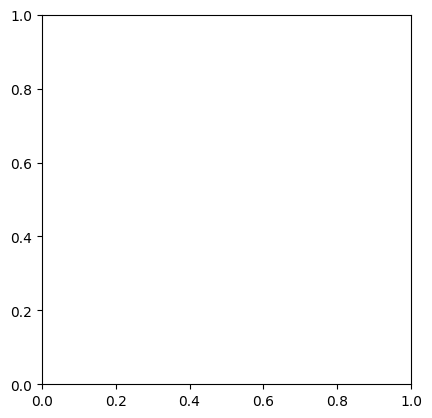

In [7]:
img_array = cv2.imread("mrleyedataset/Close-Eyes/s0001_00001_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array,cmap="gray")

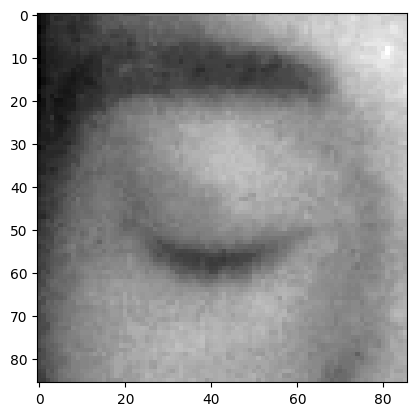

In [70]:

Datadirectory = "mrleyedataset/" ##training dataset
Classes = ["Close-Eyes", "Open-Eyes"] ## List of classes for category in Classes:
for category in Classes:
    path= os.path.join(Datadirectory, category) ## //
    for img in os.listdir (path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb= cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break


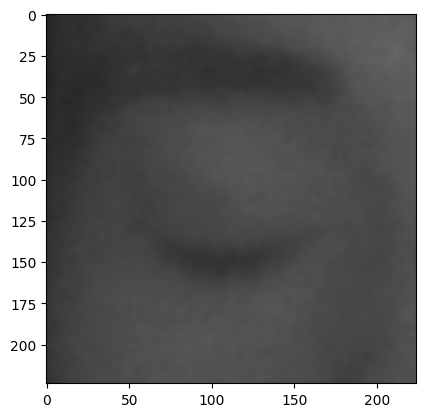

In [71]:
img_size= 224
new_array= cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [72]:
training_Data = []
def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category) 
        class_num= Classes.index (category) ## 0, 1 
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array= cv2.resize(backtorgb, (img_size, img_size)) 
                training_Data.append( [new_array, class_num])
            except Exception as e:
                pass

In [73]:
create_training_Data()

In [74]:
print(len(training_Data))

1401


In [75]:
import random
random.shuffle(training_Data)

In [76]:
import numpy as np
x = []
y = []
for features , label in training_Data:
    x.append(features)
    y.append(label)

X = np.array(x).reshape(-1,img_size,img_size,3)

In [77]:
X.shape

(1401, 224, 224, 3)

In [79]:
X = X/255.0;

MemoryError: Unable to allocate 1.57 GiB for an array with shape (1401, 224, 224, 3) and data type float64

In [80]:
Y = np.array(y)

In [81]:
import pickle
pickle_out = open("X.pickle", "wb") 
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out) 
pickle_out.close()

In [82]:
pickle_in = open("X.pickle","rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [83]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [84]:
model = tf.keras.applications.mobilenet.MobileNet()

In [85]:
model.summary

<bound method Model.summary of <keras.src.engine.functional.Functional object at 0x0000024EC52E6990>>

In [86]:
base_input = model.layers[0].input ## input

In [87]:
base_output = model.layers[-4].output

In [88]:
Flat_layer =  layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) ## one node (1/0) 
final_ouput = layers.Activation('sigmoid')(final_output)

In [89]:
new_model = keras.Model (inputs = base_input, outputs = final_output)

In [90]:
new_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [91]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [92]:
new_model.fit(X, Y, epochs=1, validation_split=0.1)


40/40 [==============================] - 259s 6s/step - loss: 1.0573 - accuracy: 0.9270 - val_loss: 6.4727 - val_accuracy: 0.5745


In [94]:
new_model.save("my_model.h5")

In [66]:
new_model = tf.keras.models.load_model('my_model_Drowsiness.h5')

OSError: No file or directory found at my_model_Drowsiness.h5

In [97]:

img_array = cv2.imread('mrleyedataset/Close-Eyes/s0001_00001_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array= cv2.resize(backtorgb, (img_size, img_size))

In [98]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [99]:
X_input.shape

(1, 224, 224, 3)

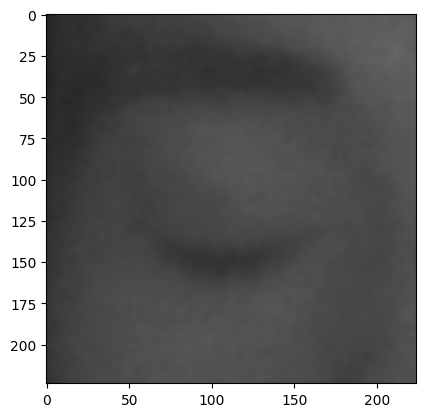

In [100]:
plt.imshow(new_array)

In [101]:
X_input = X_input/255.0

In [102]:
predection = new_model.predict(X_input)

1/1 [==============================] - 2s 2s/step


In [103]:
predection

array([[-3.3007932]], dtype=float32)

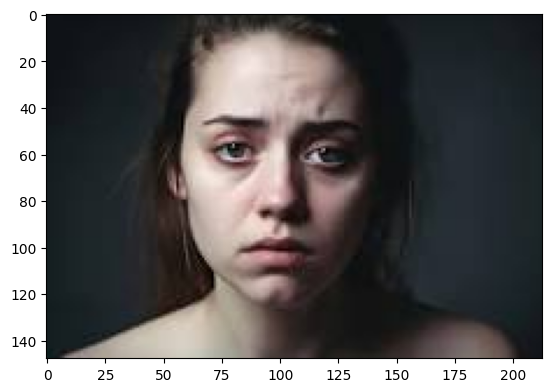

In [108]:
img = cv2.imread('download.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [109]:

faceCascade = cv2.CascadeClassifier (cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [110]:
eye_cascade = cv2.CascadeClassifier (cv2.data.haarcascades +'haarcascade_eye.xml')

In [111]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [112]:
eyes = eye_cascade.detectMultiScale (gray,1.1,4)

In [113]:
for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

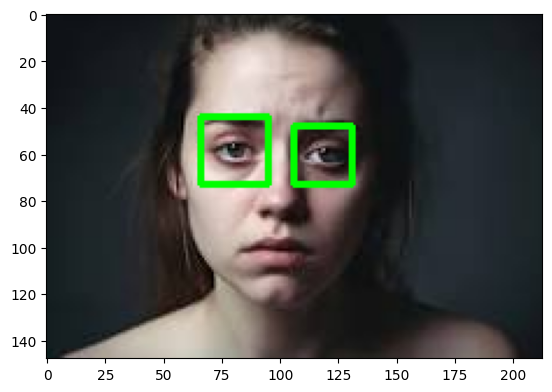

In [114]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [115]:

eye_cascade = cv2.CascadeClassifier (cv2.data.haarcascades +'haarcascade_eye.xml') 
gray =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#print (faceCascade.empty())
eyes = eye_cascade.detectMultiScale (gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w] 
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale (roi_gray) 
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

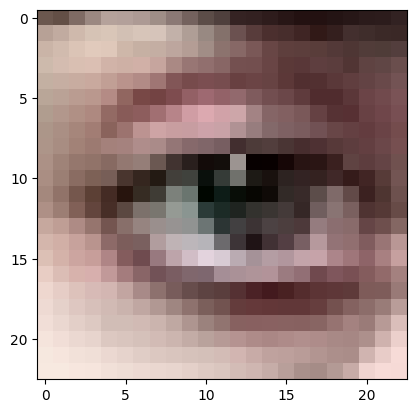

In [116]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [117]:
eyes_roi.shape

(23, 23, 3)

In [118]:

final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims (final_image, axis =0) ## need fourth dimension
final_image=final_image/255.0

In [119]:
final_image.shape

(1, 224, 224, 3)

In [120]:
new_model.predict(final_image)

1/1 [==============================] - 0s 376ms/step


array([[-3.5344653]], dtype=float32)

In [121]:

import cv2 ### pip install opencv-python
## pip install opencv-contrib-python fullpackage
#from deepface import DeepFace ## pip install deepface
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier (cv2.data.haarcascades + 'haarcascade_frontal face_default.xml')
cap = cv2.VideoCapture(1)
# Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier (cv2.data.haarcascades +'haarcascade_eye.xml')
    gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print (faceCascade.empty())
    eyes = eye_cascade.detectMultiScale (gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray= gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess =     eye_cascade.detectMultiScale (roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims (final_image, axis=0) ## need fourth dimension final_image=final_image/255.0
    Predictions = new_model.predict(final_image)
    if (Predictions>0):
        status = "Open Eyes"
    else:
        status = "Closed Eyes"
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
    print (faceCascade.empty())
    faces =  faceCascade.detectMultiScale (gray,1.1,4)
    # Draw a rectangle around the faces
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    font = cv2.FONT_HERSHEY_SIMPLEX

    
    # Use putText() method for # inserting text on video 
    cv2.putText(frame,
                status, (50, 50),
                font, 3,
                (0, 0, 255),
                2,
                cv2.LINE_4)
    cv2.imshow('Drowsiness Detection Tutorial', frame)
    if cv2.waitKey(2) & 0xFF== ord('q'):
        break
    cap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 2s 2s/step
True


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


In [ ]:
import winsound
frequency = 2500
duration = 1000
import cv2 ### pip install opencv-python
## pip install opencv-contrib-python fullpackage
#from deepface import DeepFace ## pip install deepface
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier (cv2.data.haarcascades + 'haarcascade_frontal face_default.xml')
cap = cv2.VideoCapture(1)
# Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier (cv2.data.haarcascades +'haarcascade_eye.xml')
    gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print (faceCascade.empty())
    eyes = eye_cascade.detectMultiScale (gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray= gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess =     eye_cascade.detectMultiScale (roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims (final_image, axis=0) ## need fourth dimension final_image=final_image/255.0
    Predictions = new_model.predict(final_image)
    
    if (Predictions>0):
        status= "Open Eyes" 
        cv2.putText(frame, status,
                    (150, 150),
                    font, 3,
                    (0, 255, 0),
                    2,
                    cv2.LINE_4)
        x1,y1, w1,h1 = 0,0,175,75
    # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
    # Add text
        # frame, 'Active', (x1+int (w1/10),y1+ int (h1/2)), cv2.FONT_HERSHEY SIMPLEX, 0.7, (0,255,0), 2
        cv2.putText(frame , 'Active',(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
    else:
        counter = counter + 1
        status = "Closed Eyes" 
        cv2.putText(frame,
                    status,
                    (150, 150),
                    font, 3,
                    (0, 0, 255), 2,
                    cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
        if counter>5:
            x1,y1, w1,h1 = 0,0,175,75
            # Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
            # Add text
            cv2.putText(frame, 'Sleep Alert !!', (x1+ int (w1/10),y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            winsound.Beep(frequency, duration)
            counter = 0